# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


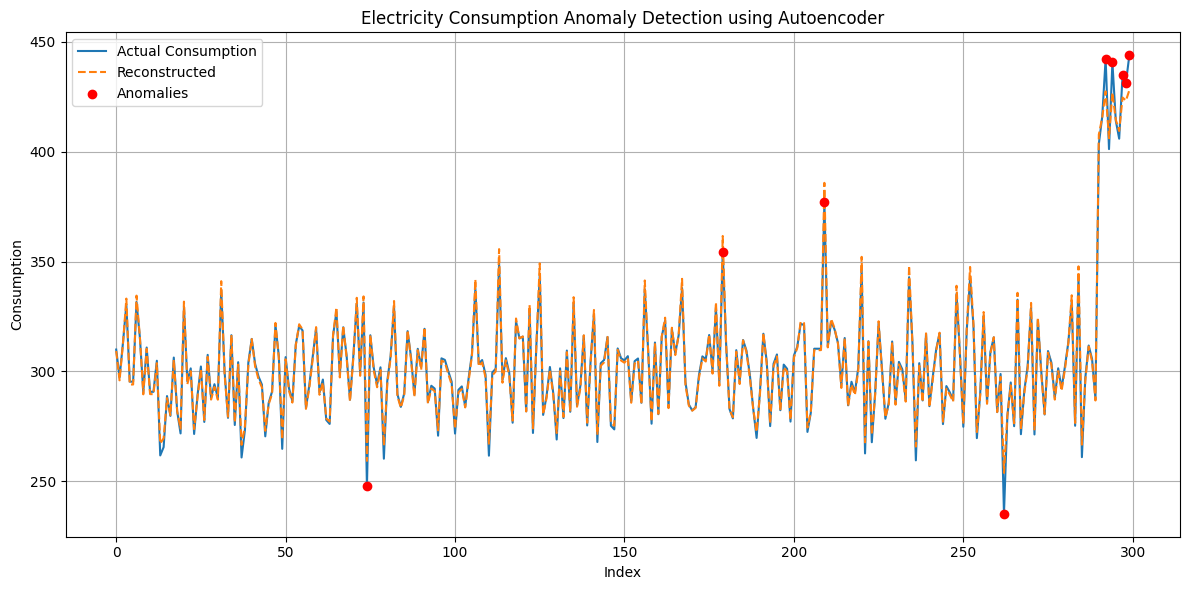

In [6]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Simulate electricity consumption data
np.random.seed(42)
normal_consumption = np.random.normal(loc=300, scale=20, size=290)
anomalies = np.random.uniform(low=400, high=450, size=10)
consumption = np.concatenate([normal_consumption, anomalies])
df = pd.DataFrame({'Consumption': consumption})

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Consumption']])

# Step 2: Build Autoencoder
input_dim = scaled_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Step 3: Identify anomalies
reconstructions = autoencoder.predict(scaled_data)
reconstruction_error = np.mean((scaled_data - reconstructions) ** 2, axis=1)
threshold = np.percentile(reconstruction_error, 97)  # Assume top 3% are anomalies

df['ReconstructionError'] = reconstruction_error
df['Anomaly'] = df['ReconstructionError'] > threshold

# Step 4: Visualize actual vs reconstructed data
plt.figure(figsize=(12, 6))
plt.plot(df['Consumption'], label='Actual Consumption')
plt.plot(scaler.inverse_transform(reconstructions), label='Reconstructed', linestyle='dashed')
plt.scatter(df[df['Anomaly']].index, df[df['Anomaly']]['Consumption'], 
            color='red', label='Anomalies', zorder=5)
plt.title('Electricity Consumption Anomaly Detection using Autoencoder')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [4]:
!pip install --upgrade pip
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 39.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.6 MB/s eta 0:00:00
 